<a href="https://colab.research.google.com/github/yupAyush/MachineLearning-from-scatch-/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small project(logistical regression)

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/placement.csv")
df =df.iloc[:,1:]
print(df.shape)
df.head()


(100, 3)


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


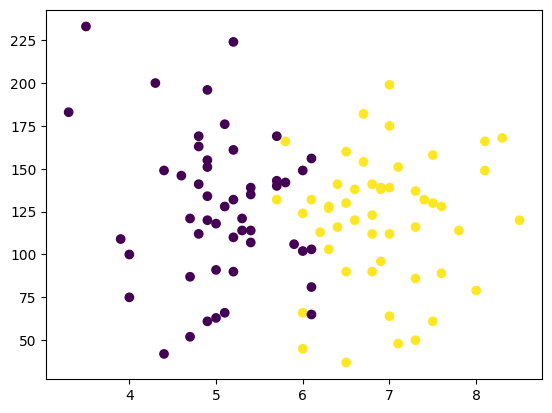

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["cgpa"],df["iq"],c=df["placement"])


In [ ]:
X= df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [ ]:
print(Y)

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf =LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
clf.predict(X_test)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
print(f" acuuracy of model is {clf.score(X_test,Y_test)*100}")

 acuuracy of model is 90.0


<Axes: >

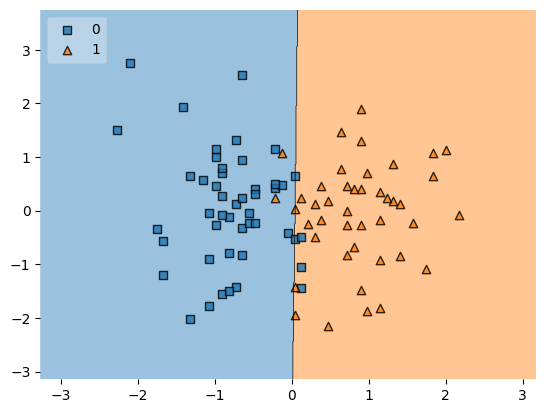

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [ ]:
import pickle
pickle.dump(clf,open("model.pkl","wb"))
model.predict([[10,100]])

# **things to ask before data relation**
* How big is data
df.shape  
*  how data looks
df.head()/df.sample() helps us to see unbiased data
*   What is data type of it = df.info()
*   are there any missing values = df.isnull().sum()
*   how data looks mathematically df.describe()
*   are there any duplicate values = df.duplicate().sum()
*   is there any correaltion between cols ? df.corr()





# **EDA(exploratory data analysis)**
* univariate analysis
data has two types 1. is numerical 2. categorical
go with countplot ,or piechart for categorical data
---
* numerical data =plt.hist(,bins=x) bins = category
* or Distplot , it has kernal density estimation (or probabilty density function) , probabilty vs data
* boxplot , it gives five number summary





In [ ]:
import seaborn as sns
df= sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


([<matplotlib.patches.Wedge at 0x7dbe97111b10>,
 [Text(-0.39257494735793463, 1.0275626067091557, 'no'),
  Text(0.3925749146953058, -1.0275626191877425, 'yes')],
 [Text(-0.21413178946796432, 0.5604886945686304, '61.6%'),
  Text(0.21413177165198496, -0.5604887013751322, '38.4%')])

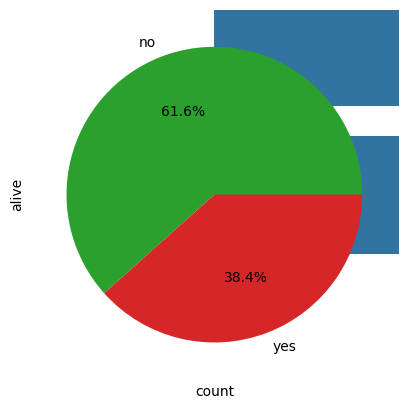

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#count plot
sns.countplot(df["alive"])
df["alive"].value_counts()
sns.countplot(df["embarked"])
#pie chart
plt.pie(df["alive"].value_counts(), labels=df["alive"].value_counts().index, autopct='%1.1f%%')

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

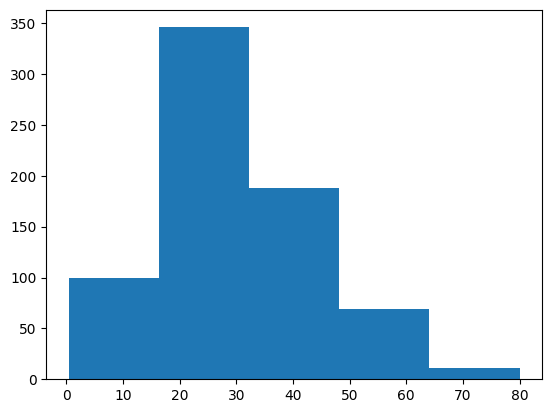

In [ ]:
#histogram
plt.hist(df["age"],bins=5)

<Axes: xlabel='age', ylabel='Density'>

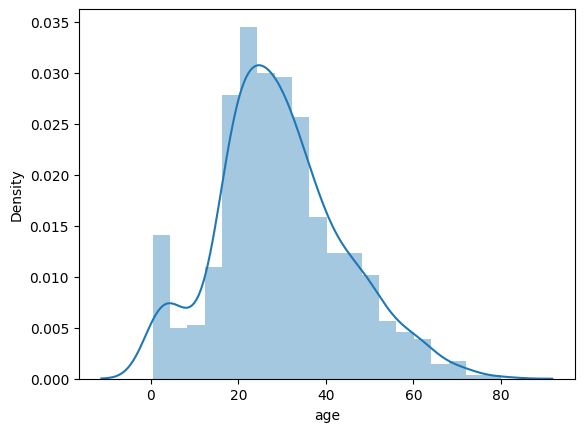

In [ ]:
#distplot
sns.distplot(df["age"])
#probabilty distribution graph

np.float64(0.38910778230082704)

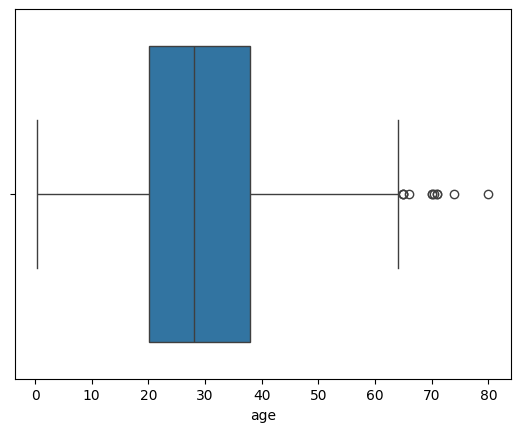

In [ ]:
#box plot
sns.boxplot(x=df["age"])
df["age"].skew()

# **Bi variate ananlysis**

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
flights = sns.load_dataset("flights")

In [ ]:
iris = sns.load_dataset("iris")

<Axes: xlabel='total_bill', ylabel='tip'>

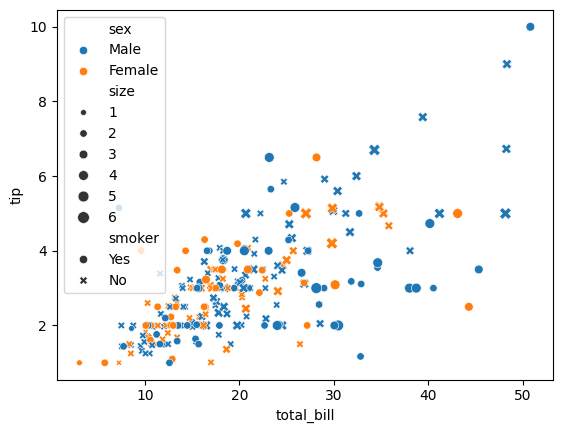

In [ ]:
#scatterplot(numerical - numerical)
sns.scatterplot(x=tips["total_bill"],y=tips["tip"],hue=tips["sex"],style=tips["smoker"],size=tips["size"])

<Axes: xlabel='pclass', ylabel='fare'>

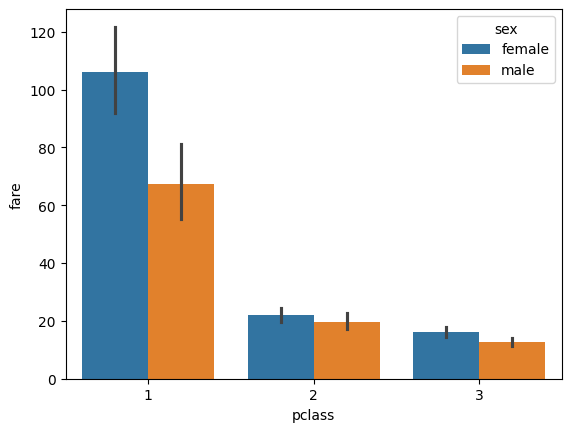

In [ ]:
#barplot (numerical - categorical)
sns.barplot(x=df["pclass"],y=df["fare"],hue=df["sex"])

<Axes: xlabel='sex', ylabel='age'>

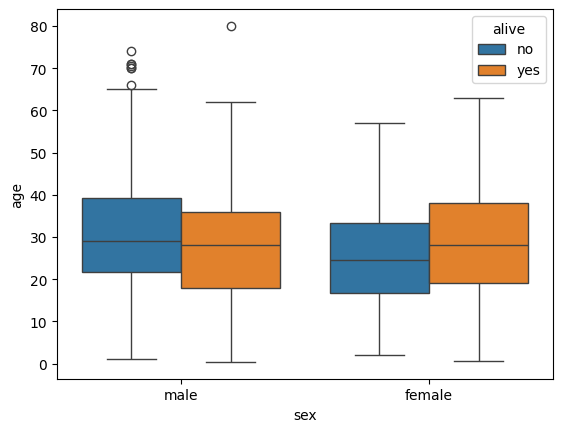

In [ ]:
sns.boxplot(x=df["sex"],y=df["age"],hue=df["alive"])

<Axes: xlabel='age', ylabel='Density'>

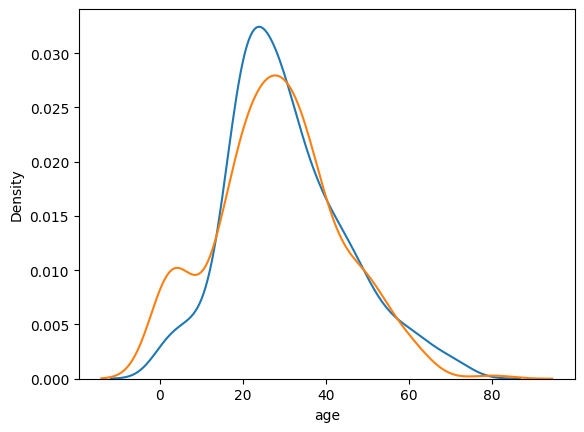

In [ ]:
#distplot
sns.distplot(df[df["alive"]=="no"]["age"],hist=False)
sns.distplot(df[df["alive"]=="yes"]["age"],hist=False)

<Axes: xlabel='alive', ylabel='pclass'>

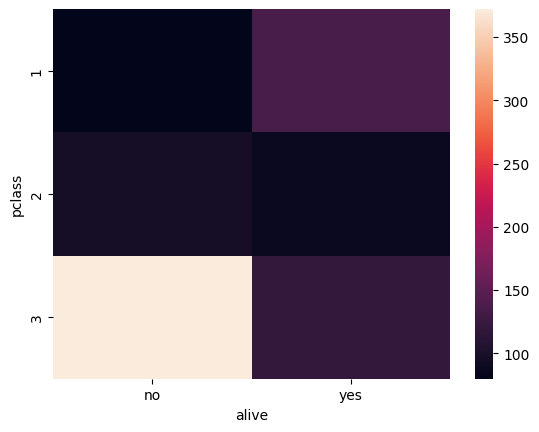

In [ ]:
import pandas as pd
#heatmap (categorical-categorical)
sns.heatmap(pd.crosstab(df["pclass"],df["alive"]))


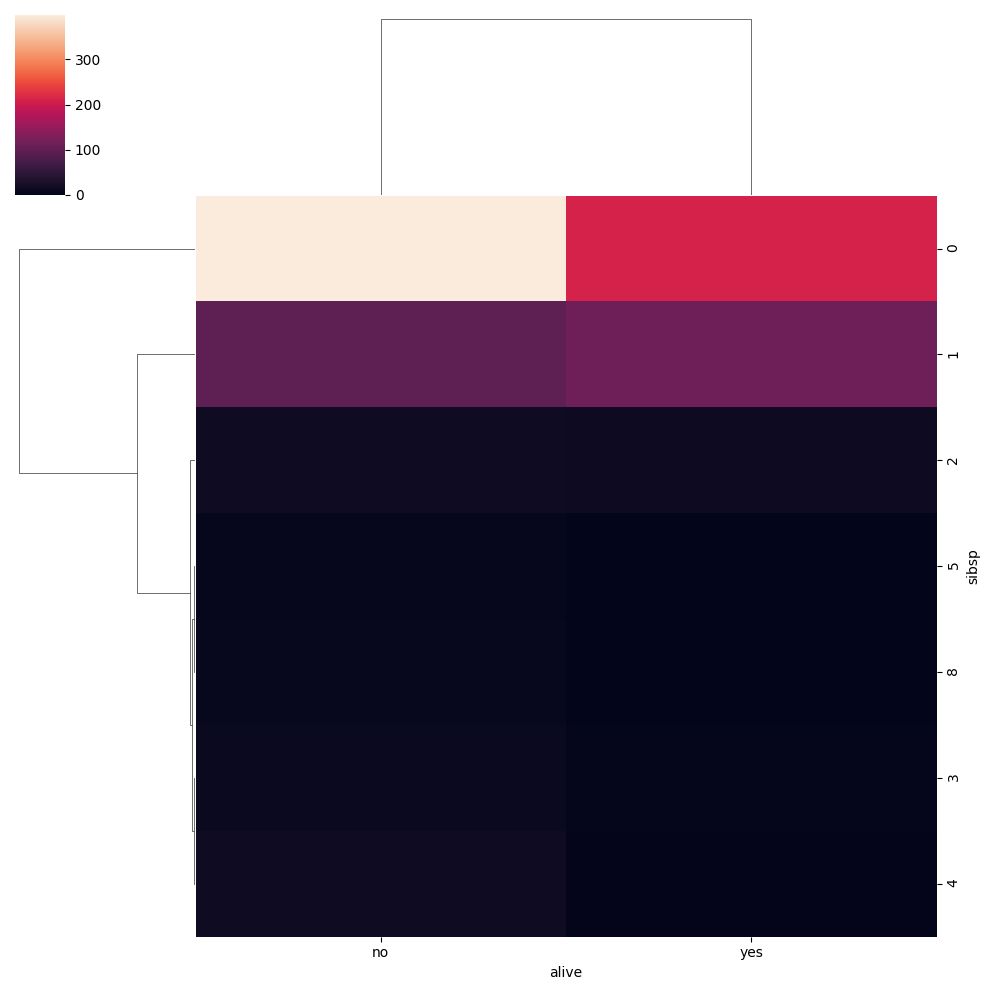

In [ ]:
#clustermap
sns.clustermap(pd.crosstab(df["sibsp"],df["alive"]))

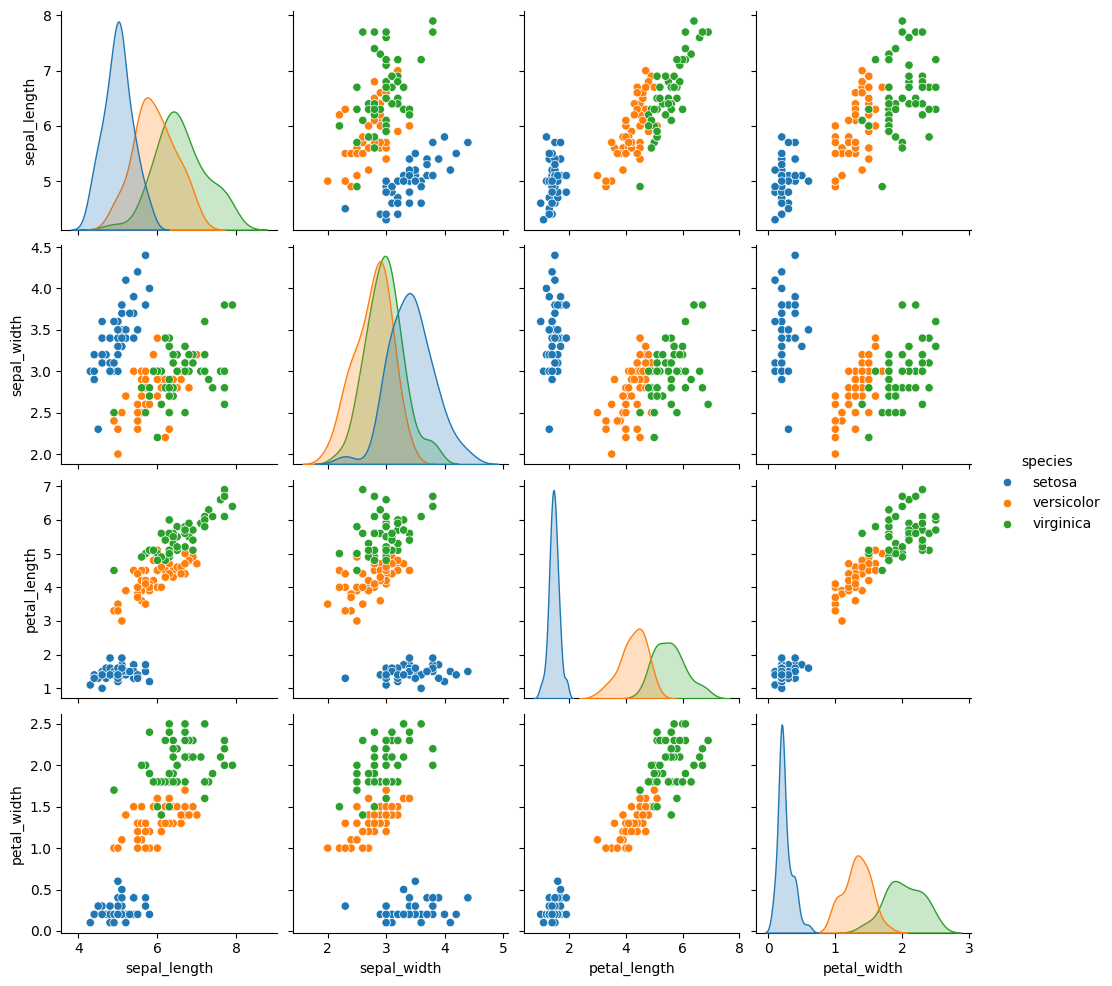

In [ ]:
sns.pairplot(iris,hue="species") #every combination scatter plot

In [ ]:
# line plot (numerical - numerical) for linear relationship

# **Standardization**

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)# to get the same values everytime

ages = np.random.randint(21, 61, size=100)

salaries = np.random.randint(30000, 150001, size=100)

pur = np.random.randint(0,2,size=100)


df = pd.DataFrame({
    'Age': ages,
    'Salary': salaries,
    "purchased":pur
})


print(df.head())





   Age  Salary  purchased
0   59  119135          1
1   49   65222          0
2   35  107373          1
3   28  109575          1
4   41  126354          1


In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)
print(x_train.shape)
print(x_test.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)# this gives a numpy array
x_test_scaled = scaler.transform(x_test)#
print(x_train_scaled)
print(x_test_scaled)

x_train_scaled =pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled =pd.DataFrame(x_test_scaled,columns=x_test.columns)



,Age,Salary
count,20.0,20.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-1.0
50%,0.0,-0.0
75%,1.0,1.0
max,2.0,1.0


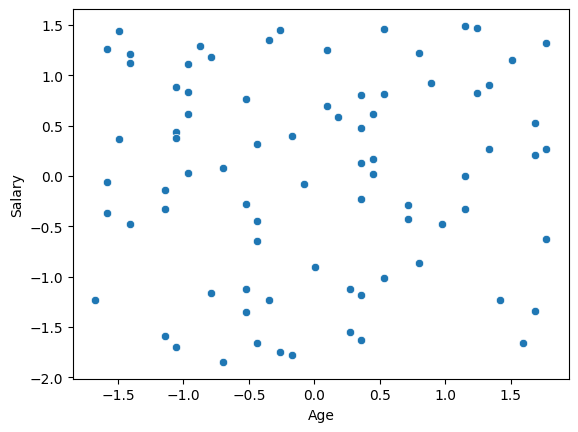

In [ ]:
import seaborn as sns

sns.scatterplot(x=x_train_scaled["Age"],y=x_train_scaled["Salary"])# it has mean = 0 and standard deviation 1
np.round(x_test_scaled.describe())

# **Normalization**

In [ ]:
import random
import numpy as np
import pandas as pd
np.random.seed(42)
values =np.random.randint(0,22,size=100)
df =pd.DataFrame({"values":values})
df.head()
from sklearn.preprocessing import MinMaxScaler # xi-xmin/(xmax-xmin)
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled,columns= df.columns)
df_scaled.head()
np.round(df_scaled.describe())



,values
count,100.0
mean,1.0
std,0.0
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,1.0


# **oneHotEncoding**



In [ ]:
#ordinal encoding
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv')
df= df.iloc[:,2:]


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)
from sklearn.preprocessing import OrdinalEncoder
print(X_train.head())

oe =OrdinalEncoder(categories=[["Poor","Average","Good"],["School","UG","PG"]])# < < <
oe.fit(X_train)

X_train = oe.transform(X_train)
X_test = oe.transform(X_test)
print(X_train)
df.head()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)
print(Y_train)

[0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0
 1 1 1]


In [ ]:
#one hot encoding
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day27-one-hot-encoding/cars.csv")
X_train,X_test,Y_train,Y_test= train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2)

ohe =OneHotEncoder(drop="first", sparse_output=False) #drop first drops the first encoded column to overcome multicolinarity
ohe.fit(X_train[["fuel","owner"]]) #fit the encoder

X_train_new = ohe.transform(X_train[["fuel","owner"]]) #transform the data and get a numpy array
X_test_new = ohe.transform(X_test[["fuel","owner"]]) #transform the test data

X_train=np.hstack((X_train[["brand","km_driven"]].values,X_train_new))
X_test=np.hstack((X_test[["brand","km_driven"]].values,X_test_new))

print(X_train.shape)

(6502, 9)


In [ ]:
#one hot encoding for most frequent variables
counts = df["brand"].value_counts()
counts =counts[counts<=100].index
one_hot_encoded_df = pd.get_dummies(df["brand"].replace(counts,"uncommon"))
one_hot_encoded_df = one_hot_encoded_df.astype(int)
one_hot_encoded_df.head(10)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0


# **Transformers(skitlearn)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day28-column-transformer/covid_toy.csv")
X_train,X_test,Y_train,Y_test= train_test_split(df.iloc[:,0:5],df.iloc[:,-1],test_size=0.2)
print(X_train.shape)
trans = ColumnTransformer(transformers=[
    ("tnf1",SimpleImputer(),["fever"]),
    ("tnf2",OrdinalEncoder(categories=[["Mild","Strong"]]),["cough"]),
    ("tnf3",OneHotEncoder(sparse_output=False,drop="first"),["gender","city"]),

],remainder="passthrough")

X_train = trans.fit_transform(X_train)# fit learns the parameter of the given data(unique values, missing ,mean,etc) , tranform tranforms the data
print(X_train)
X_test = trans.transform(X_test)
X_test = trans.transform(X_test)
print(X_test)


df.head()

# **Sckitlearn pipelines**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline

df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day29-sklearn-pipelines/train.csv")
df.drop(columns=["Name","PassengerId","Ticket","Cabin"],inplace=True)

print(df.isnull().sum())

imp1 = SimpleImputer()
imp2 = SimpleImputer(strategy="most_frequent")#fills the missing values with the most frequent values

X_train,X_test,Y_train,Y_test= train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2)


trf1 = ColumnTransformer(transformers=[
    ("impute_age",imp1,[2]),
    ("impute_embarked",imp2,[6])
],remainder="passthrough")

trf2 = ColumnTransformer(transformers=[
    ("ohe_sex_embarked",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[1,6])
],remainder="passthrough")

trf3 =ColumnTransformer([("minmaxscaler",MinMaxScaler(),slice(0,10))])

trf4 =DecisionTreeClassifier()


pipe = make_pipeline(trf1,trf2,trf3,trf4)
pipe.fit(X_train,Y_train)

X_train_predict=pipe.predict(X_train)

from sklearn.metrics import accuracy_score

print(f" acccuracy is {accuracy_score(Y_train,X_train_predict)*100}%")
from sklearn import set_config
set_config(display="diagram")
pipe.fit(X_train,Y_train)



Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
 acccuracy is 63.34269662921348%


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
import pickle

pickle.dump(pipe,open("pipe.pkl","wb"))


In [ ]:
import pickle
import numpy as np

pipe=pickle.load(open("/content/pipe.pkl","rb"))

test_Data =np.array([1,"female",31.0,1,0,15.8,"Q"],dtype=object).reshape(1,7)
pipe.predict(test_Data)

array([0])

# **Function Transformer**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day29-sklearn-pipelines/train.csv")
df.drop(columns=["Name","PassengerId","Ticket","Cabin","Sex","Embarked","SibSp","Parch","Pclass"],inplace=True)
df.head()
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # Import mean_squared_error


# sns.distplot(df["Fare"]) # fare is right skewed , that means we have to apply log transform



df["Age"].fillna(df["Age"].mean(),inplace=True)
df.head()


# trans = ColumnTransformer(transformers=[("log",)],remainder="passthrough")

#before using function transformer

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2)
from sklearn.metrics import accuracy_score

clf= LinearRegression()
clf.fit(X_train,Y_train)
y_train_predict=np.round(clf.predict(X_train))


print(f"accuracy score on training data: {accuracy_score(Y_train,y_train_predict)*100}")
ft = FunctionTransformer(func=np.log1p) # log(1+value)



#after function transformer
trans = ColumnTransformer(transformers=[("log",ft,["Fare"])],remainder="passthrough")
xt=trans.fit_transform(X_train)
print(xt)
clf= LinearRegression()
clf.fit(xt,Y_train)
yp=np.round(clf.predict(xt))
print(f"accuracy score on training data after log tranform: {accuracy_score(Y_train,yp)*100}")
# hence data has to have normal distribution for linear models


accuracy score on training data: 66.71348314606742
[[ 3.56600536 16.        ]
 [ 2.69884126 29.69911765]
 [ 2.1071783  25.        ]
 ...
 [ 2.38377791 20.        ]
 [ 2.63905733 50.        ]
 [ 0.         39.        ]]
accuracy score on training data after log tranform: 67.83707865168539


# Power **transformers(boz-cox and yeo jhonson)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv")
x = df.drop(columns=["Strength"])
y = df.iloc[:,-1]

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2)
X_train.describe()



In [ ]:
import seaborn as sns
for cols in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121) #1: The number of rows in the grid.
# 2: The number of columns in the grid.
# 1: The index of the current subplot (starting from 1).
  sns.distplot(X_train[cols])
  plt.title(f"before transformation {cols}")


In [ ]:
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train,Y_train)
y_train_predict=np.round(model.predict(X_train))
print(f"accuracy score before transformation: {r2_score(Y_train,y_train_predict)*100}")

pt = PowerTransformer(method="box-cox")
x_train_new=pt.fit_transform(X_train+0.000001)# because boxcox cant be used for 0 or negative values
model.fit(x_train_new,Y_train)
y_train_predict=np.round(model.predict(x_train_new))
print(f"accuracy score after box cox transformation: {r2_score(Y_train,y_train_predict)*100}")

pt2 = PowerTransformer(method="yeo-johnson")
x_train_new2=pt2.fit_transform(X_train)#

model.fit(x_train_new2,Y_train)
y_train_predict=np.round(model.predict(x_train_new2))
print(f"accuracy score after yeo jhonson transformation: {r2_score(Y_train,y_train_predict)*100}")

print(pt2.lambdas_)
print(pt.lambdas_)



In [ ]:
import seaborn as sns
for i, cols in enumerate(X_train.columns):#enumrate returns both index and value
  plt.figure(figsize=(14,4))
  plt.subplot(121) #1: The number of rows in the grid.
# 2: The number of columns in the grid.
# 1: The index of the current subplot (starting from 1).
  sns.distplot(x_train_new[:, i]) # Access data by column index
  plt.title(f"after transformation {cols}")

# **binning and binarization**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv",usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
print(df.shape)
print(df.head())

x= df.iloc[:,1:3]
y=df.iloc[:,0]

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2)

print(X_train.head())
clf= DecisionTreeClassifier()

clf.fit(X_train,Y_train)
y_test_predict=np.round(clf.predict(X_test))
print(f"accuracy score before binning: {accuracy_score(Y_test,y_test_predict)*100}")
print(Y_train.head())

kbin_age= KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")
kbin_fare= KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")

trf =ColumnTransformer(transformers=[
    ("first",kbin_age,[0]),
    ("second",kbin_fare,[1])
],remainder="passthrough")

X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)
print(trf.named_transformers_["first"].bin_edges_)


clf.fit(X_train_trf,Y_train)
y_test_predict=np.round(clf.predict(X_test_trf))
print(f"accuracy score after binning: {accuracy_score(Y_test,y_test_predict)*100}")

# binarization is basically converting any column into 0 or 1



# **Handling mixed variables**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day33-handling-mixed-variables/titanic.csv")


df["number"].unique()

df["number_numerical"]=pd.to_numeric(df["number"],errors="coerce",downcast="integer")
df["numerical_categorical"]=np.where(df["number_numerical"].isnull(),df["number"],np.nan)


df["cabin_numerical"]=df["Cabin"].str.extract("(\d+)") #extract numerical data
df["cabin_categorical"]=df["Cabin"].str[0]

df["Ticket_numerical"]=df["Ticket"].apply(lambda s:s.split()[-1]) #spliting the last item in the string array
df["Ticket_numerical"]=pd.to_numeric(df["Ticket_numerical"],errors="coerce",downcast="integer")
df["Ticket_categorical"]=df["Ticket"].apply(lambda s:s.split()[0])
df["Ticket_categorical"]=np.where(df["Ticket_categorical"].str.isdigit(),np.nan,df["Ticket_categorical"])

df.head()




# **Handling date and time variables**

In [ ]:
import pandas as pd
import numpy as np
import datetime
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day34-handling-date-and-time/messages.csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day34-handling-date-and-time/orders.csv")

print(df1.head())
df["date"].info()
df["date"]=pd.to_datetime(df["date"])

df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day
df["month_name"]=df["date"].dt.month_name()
df["day_name"]=df["date"].dt.day_name()

today = datetime.datetime.today()
print(today)
df["Since_today"]=(today-df["date"])
df["time"]=df["date"].dt.time


df.head()


df.head(10)

# **Handling missing data**

CCA(complete case **analysis**)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv")
print("Original DataFrame shape:", df.shape)
print("Missing values before dropping:\n", df.isnull().sum())

cols =[var for var in df.columns if df[var].isnull().mean()*100 < 5 and df[var].isnull().mean() >0]
print("\nColumns with less than 5% missing values:", cols)

# Drop rows with missing values in the specified subset of columns (cols) and assign back to df
df = df.dropna(subset=cols)

print("\nDataFrame shape after dropping rows with missing values in selected columns:", df.shape)
print("Missing values after dropping:\n", df.isnull().sum())
print(df[cols].isnull().mean()*100)




df.head()

print("hellooooooooo",df["enrolled_university"].isnull().mean()*100) # we preserve ratios in categorical data

**random** **imputation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv",usecols=['Age','Fare','Survived'])
df.isnull().mean()*100 # age has 20 percent missing values
df.head()

x=df.iloc[:,1:3]
y =df["Survived"]

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2)
X_train["age_imputated"]=X_train["Age"]
X_test["age_imputated"]=X_test["Age"]

X_train["age_imputated"][X_train["age_imputated"].isnull()]=X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
print("missing values after imputation",X_train["age_imputated"].isnull().sum())

import seaborn as sns
sns.distplot(X_train["Age"],label="beforeimputation",hist=False)
sns.distplot(X_train["age_imputated"],label="afterimputation",hist=False)








 **Missing indicator**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv",usecols=['Age','Fare','Survived'])
df.isnull().mean()*100 # age has 20 percent missing values
x=df.iloc[:,1:3]
y =df["Survived"]
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2)
li =LinearRegression()
X_train["Age"].fillna(X_train["Age"].mean(),inplace=True)
X_test["Age"].fillna(X_train["Age"].mean(),inplace=True)

li.fit(X_train,Y_train)
y_test_predict=np.round(li.predict(X_test))
print(f"accuracy before missing indicator {accuracy_score(Y_test,y_test_predict)*100}%")



si=SimpleImputer(add_indicator=True)#adds a missing indicator
X_train_new=si.fit_transform(X_train)
X_test_new=si.transform(X_test)
print(X_train_new)
model = LinearRegression()
model.fit(X_train_new,Y_train)
y_test_predict_new=model.predict(X_test_new)
print(f"accuracy after missing indicator {accuracy_score(Y_test,np.round(y_test_predict_new))*100}%")



accuracy before missing indicator 65.92178770949721%
[[30.05786458  7.75      ]
 [45.5        28.5       ]
 [30.05786458  8.05      ]
 ...
 [18.         13.        ]
 [30.05786458 69.55      ]
 [49.          0.        ]]
accuracy after missing indicator 65.92178770949721%


/tmp/ipython-input-25-3016670951.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Age"].fillna(X_train["Age"].mean(),inplace=True)
/tmp/ipython-input-25-3016670951.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

**automatically selecting values for impuration using gridsearchcv , important in hyperparamter tuning**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler





df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv")

df.drop(["Ticket","Cabin","PassengerId","Name"],axis=1,inplace=True) # Corrected column names and added axis=1
print(df.isnull().mean()*100)

x = df.iloc[:,1:8]
y= df.iloc[:,0]

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2)

numerical_cols  = ["Age","Fare"]
categorical_cols = ["Embarked","Sex"]
num_transformer =Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("scaler",StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ("num",num_transformer,numerical_cols),
    ("cat",cat_transformer,categorical_cols)
])

model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",LogisticRegression())
])

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64


In [ ]:
from sklearn import set_config

set_config(display='diagram')
model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Embarked', 'Sex'])])),
                ('model', LogisticRegression())])

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'model__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(model, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, Y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'model__C': 0.1, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.782


In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_model__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

# **KNN imputer (k nearest neighbour)**

In [ ]:
# knn is way better than any other imputer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv")

df.drop(["Ticket","Cabin","PassengerId","Name","Embarked","SibSp","Parch","Sex"],axis=1,inplace=True) # Corrected column names and added axis=1
print(df.isnull().mean()*100)

x = df.iloc[:,1:8]
y= df.iloc[:,0]

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2) # this mother fucker is changing accuracy evertyime



knn = KNNImputer(n_neighbors=3,weights="distance")
X_train_new=knn.fit_transform(X_train)
X_test_new=knn.transform(X_test)

li = LogisticRegression()
li.fit(X_train_new,Y_train)
y_test_predict=np.round(li.predict(X_test_new))
print(f"accuracy before Knn imputer {accuracy_score(Y_test,y_test_predict)*100}%")

si = SimpleImputer()
li2 = LogisticRegression()
X_train_new2=si.fit_transform(X_train)
X_test_new2=si.transform(X_test)
li2.fit(X_train_new2,Y_train)
y_test_predict2=np.round(li.predict(X_test_new2))
print(f"accuracy after simple imputer {accuracy_score(Y_test,y_test_predict2)*100}%")



y.head()


Survived     0.00000
Pclass       0.00000
Age         19.86532
Fare         0.00000
dtype: float64
accuracy before Knn imputer 71.50837988826815%
accuracy after simple imputer 70.94972067039106%


,Survived
0,0
1,1
2,1
3,1
4,0


# **Iterative Imputer**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv")

df.drop(["Ticket","Cabin","PassengerId","Name","Embarked","SibSp","Parch","Sex"],axis=1,inplace=True)
print(df.isnull().mean()*100)

x = df.iloc[:,1:8]
y= df.iloc[:,0]

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2)


Survived     0.00000
Pclass       0.00000
Age         19.86532
Fare         0.00000
dtype: float64


In [ ]:
from sklearn.compose import  ColumnTransformer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression


trf = ColumnTransformer(transformers=[
    ("first",IterativeImputer(max_iter=10,estimator=LinearRegression()),["Age"]),
],remainder="passthrough")

X_train_new=trf.fit_transform(X_train)
X_test_new=trf.transform(X_test)

X_train_new_df = pd.DataFrame(X_train_new, columns=["Age_imputed", "Pclass", "Fare"])
print("missing values after iterative imputer ",X_train.isnull().mean()*100)


li=LogisticRegression()
li.fit(X_train_new,Y_train)
y_test_predict=np.round(li.predict(X_test_new))
print(f"accuracy after iterative imputer or MICE(multivairate imputation by chained equation) {accuracy_score(Y_test,y_test_predict)*100}%")

trf2 = ColumnTransformer(transformers=[
    ("first",KNNImputer(n_neighbors=3,weights="distance"),["Age"]),
],remainder="passthrough")

X_train_new2=trf2.fit_transform(X_train)
X_test_new2=trf2.transform(X_test)

lg= LogisticRegression()

lg.fit(X_train_new2,Y_train)
y_test_predict2=np.round(lg.predict(X_test_new2))
print(f"accuracy before iterative imputer  {accuracy_score(Y_test,y_test_predict2)*100}%")


missing values after iterative imputer  Pclass     0.00000
Age       20.08427
Fare       0.00000
dtype: float64
accuracy after iterative imputer or MICE(multivairate imputation by chained equation) 69.27374301675978%
accuracy before iterative imputer  69.27374301675978%


# **Outliers**

/tmp/ipython-input-605001733.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])
/tmp/ipython-input-605001733.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


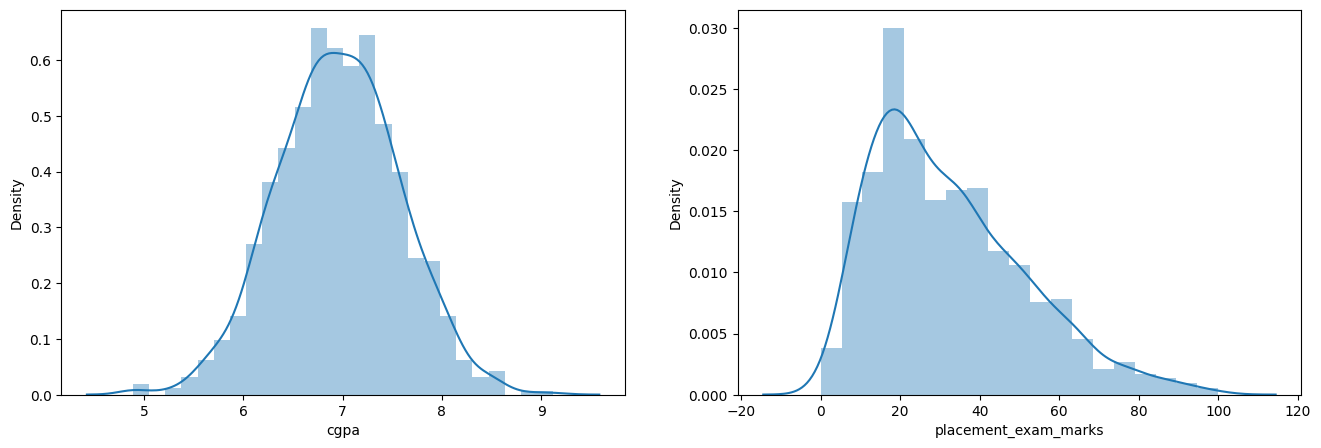

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64
8.808933625397168 5.113546374602832


,cgpa
count,1000.000000
mean,8.801543
std,0.165180
min,5.113546
25%,8.808934
50%,8.808934
75%,8.808934
max,8.808934


In [ ]:
#z score test using
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["cgpa"])
plt.subplot(1,2,2)
sns.distplot(df["placement_exam_marks"])
plt.show()

print(df["cgpa"].describe())

df["zScore"] = (df["cgpa"]-df["cgpa"].mean())/df["cgpa"].std()

new_df=df[(df["zScore"]<3) & (df["zScore"]>-3)]

upper_limit = df["cgpa"].mean()+3*df["cgpa"].std()
lower_limit = df["cgpa"].mean()-3*df["cgpa"].std()

#capping
print(upper_limit,lower_limit)



df["cgpa"] = np.where(df["zScore"]<3 ,upper_limit ,np.where(df["zScore"]>-3,lower_limit,df["cgpa"]))
df["cgpa"].shape
df["cgpa"].describe()

# **outlier reducing IQR**

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
5,7.30,23.0,1
6,6.69,11.0,0
7,7.12,39.0,1
8,6.45,38.0,0
9,7.75,84.5,1


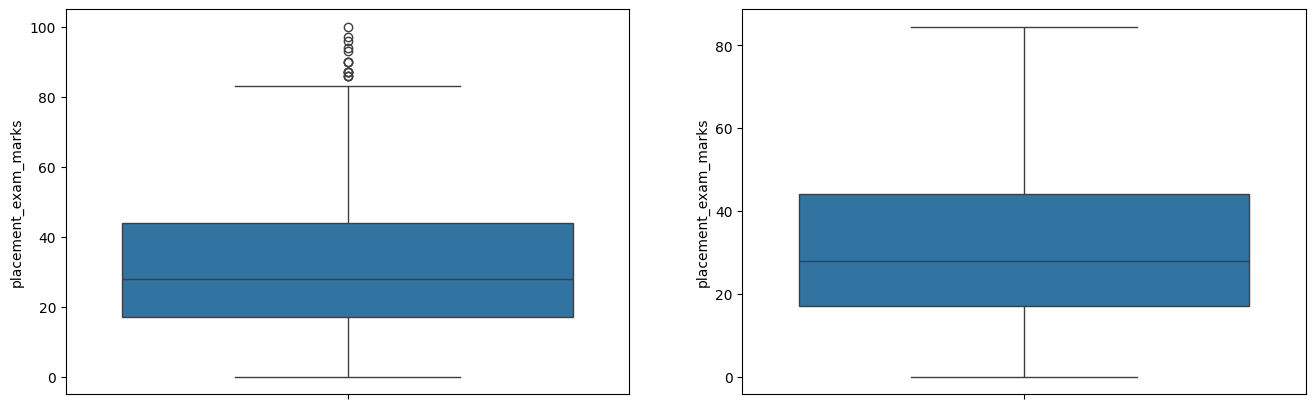

In [ ]:
# q1 = 25%ile q2 = 75%ile vlaue
# iqr is  q1-q2
# min  value q1-1.5*iqr
#max value q1+1.5*iqr
# this works on skewed graphs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day43-outlier-removal-using-iqr-method/placement.csv")
q1 = df["placement_exam_marks"].quantile(0.25)
q3 = df["placement_exam_marks"].quantile(0.75)
iqr = q3-q1
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df["placement_exam_marks"])


df["placement_exam_marks"]=np.where(df["placement_exam_marks"]>upper_limit,upper_limit,np.where(df["placement_exam_marks"]<lower_limit,lower_limit,df["placement_exam_marks"]))


plt.subplot(1,2,2)
sns.boxplot(df["placement_exam_marks"])

#capping is always better if u have too much out

df.head(10)

# outlier removal using percentile method

/tmp/ipython-input-3818978388.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])
/tmp/ipython-input-3818978388.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


before removing outliers 0.04936908937689031
after removing outliers 0.03516954996830591


,Gender,Height,Weight
0,Male,72.617106,241.893563
1,Male,68.781904,162.310473
2,Male,72.617106,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


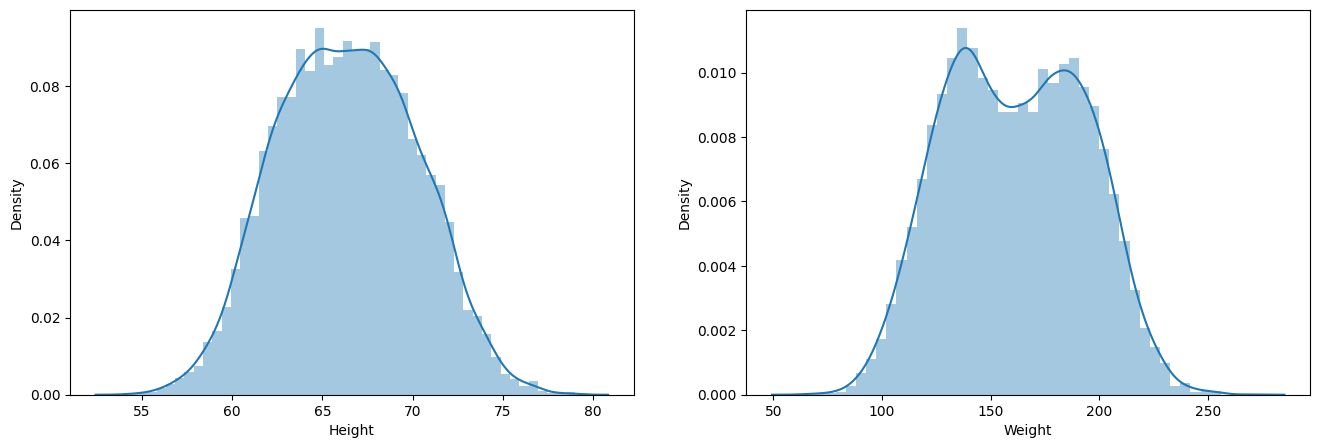

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv")
# for skewed data

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["Height"])
plt.subplot(1,2,2)
sns.distplot(df["Weight"])
plt.show

upper_limit = df["Height"].quantile(0.95)
lower_limit = df["Height"].quantile(0.05)
print("before removing outliers",df["Height"].skew())

df["Height"]=np.where(df["Height"]>upper_limit,upper_limit,np.where(df["Height"]<lower_limit,lower_limit,df["Height"]))
print("after removing outliers",df["Height"].skew())


df.head(10)

# PCA from scratch

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
np.random.seed(23)
my_vect1 =np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class_sample1 = np.random.multivariate_normal(my_vect1,cov_mat1,20)
df = pd.DataFrame(class_sample1,columns=["feature1","feature2","feature3"])
df["target"]=1
my_vect2 =np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class_sample2 = np.random.multivariate_normal(my_vect2,cov_mat2,20)
df2 = pd.DataFrame(class_sample2,columns=["feature1","feature2","feature3"])
df2["target"]=0
df=pd.concat([df,df2],ignore_index=True)
df.head(10)


,feature1,feature2,feature3,target
0,0.666988,0.025813,-0.777619,1
1,0.948634,0.701672,-1.051082,1
2,-0.367548,-1.137460,-1.322148,1
3,1.772258,-0.347459,0.670140,1
4,0.322272,0.060343,-1.043450,1
5,-1.009942,0.441736,1.128877,1
6,-1.838068,-0.938769,-0.201841,1
7,1.045371,0.538162,0.812119,1
8,0.241106,-0.952510,-0.136267,1
9,1.267248,0.173634,-1.223255,1


In [27]:
import plotly.express as px
fig =px.scatter_3d(df,x=df["feature1"],y=df["feature2"],z=df["feature3"],color=df["target"].astype(str))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()


In [7]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df.iloc[:,0:3]=sc.fit_transform(df.iloc[:,0:3])
df.head()

,feature1,feature2,feature3,target
0,0.204020,-0.415201,-1.270487,1
1,0.450354,0.229931,-1.510875,1
2,-0.700809,-1.525586,-1.749156,1
3,1.170715,-0.771502,0.002171,1
4,-0.097477,-0.382241,-1.504166,1


In [12]:
cov_matrix =np.cov([df.iloc[:,0],df.iloc[0:,1],df.iloc[:,2]])
print(cov_matrix)

[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [26]:
eigen_values ,eigen_vectors =np.linalg.eig(cov_matrix)
print("eigen values\n ",eigen_values)
print("\n\n")
print("eigen vectors\n",eigen_vectors)
eigen_vectors[0:2].shape

eigen values
  [1.3536065  0.94557084 0.77774573]



eigen vectors
 [[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]


(2, 3)

In [24]:
eigen_vectors.shape
pc = eigen_vectors[0:2]

features_selected= np.dot(df.iloc[:,0:3],pc.T)
features_selected

array([[-0.42938381,  0.82926458],
       [-1.12452035,  0.84222628],
       [ 0.59943321,  1.79586208],
       [-0.09455622, -0.76156564],
       [-0.40154161,  1.20306094],
       [ 0.88673295,  0.52266372],
       [ 1.6316766 ,  1.89452651],
       [-0.27873196, -0.44758065],
       [ 0.68860521,  0.65808377],
       [-0.99740761,  0.77893827],
       [-0.43477695, -0.6038357 ],
       [-0.62158585,  0.02311035],
       [ 1.56728555,  1.73096695],
       [ 0.62395294,  0.0883712 ],
       [-0.27187555,  0.49822203],
       [-0.47844383,  0.77437194],
       [ 0.7417154 ,  1.02382203],
       [-0.1445586 ,  0.49489533],
       [ 1.72611407,  0.49251144],
       [ 1.30454939,  0.47664493],
       [ 0.23211323, -1.15324986],
       [ 0.48480244, -1.21770771],
       [-3.36771525, -0.25462736],
       [-0.22079684, -1.44191108],
       [-1.34882334, -0.53611868],
       [-0.06917835, -0.13099355],
       [-0.13833107, -0.36837179],
       [-0.75789038, -2.42261536],
       [ 1.46433614,

In [22]:
new_df = pd.DataFrame(features_selected,columns=["PC1","PC2"])
new_df.head()

,PC1,PC2
0,-0.429384,0.829265
1,-1.124520,0.842226
2,0.599433,1.795862
3,-0.094556,-0.761566
4,-0.401542,1.203061
